In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
data = pd.read_csv( 'adult.csv', delimiter = ',' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


В данном датасете нет пропусков

In [ ]:
(data.isna().mean()*100).round(2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit( data['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K', nan], dtype=object)

In [ ]:
le.transform( ['<=50K','>50K'])

array([0, 1])

записываем в таргетную переменную y преобразованный столбец income

In [ ]:
y = pd.Series (data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

Text(0, 0.5, ' bj')

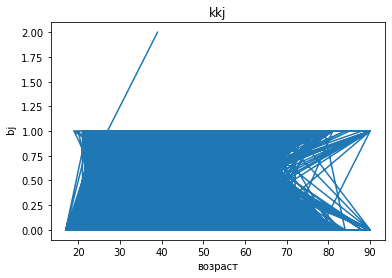

In [ ]:
plt.plot(data['age'],y)
plt.title('зависимость дохода от возраста ')
plt.xlabel('возраст')
plt.ylabel(' доход')


In [ ]:
from sklearn.linear_model import LogisticRegression

 попробуем выбрать какие-нибудь признаки, для начала

In [ ]:
selectedColumns = data [['education', 'income','age']]

столбецeducation- категориальная переменная 
переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями

In [ ]:
X = pd.get_dummies (selectedColumns, columns = ['education'])

In [ ]:
del X['income']

Пометили образование  единичкой.

In [ ]:
X.head(10)

,age,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,28,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,29,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
model = LogisticRegression()

Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

обучаем на части датасета (train)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions[:5]

array([1, 0, 0, 0, 0])

In [ ]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
model.predict_proba(X_test)

array([[2.51588989e-01, 7.48411010e-01, 3.65615578e-10],
       [7.87025979e-01, 2.12972479e-01, 1.54160062e-06],
       [8.89745016e-01, 1.10240450e-01, 1.45338258e-05],
       ...,
       [8.89745016e-01, 1.10240450e-01, 1.45338258e-05],
       [4.93124906e-01, 5.06874979e-01, 1.14380960e-07],
       [3.81172770e-01, 6.18827186e-01, 4.38280820e-08]])

In [ ]:
model.score(X_train, y_train) 

0.7838549283416204

In [ ]:
model.score(X_test,y_test)

0.7825295723384895

In [ ]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf.score(X_train, y_train) 

0.7925319294140587

In [ ]:
clf.score(X_test, y_test)

0.792798648121669

In [ ]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
svc.score(X_train, y_train)

0.7940918397192162